In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from tqdm.notebook import tqdm

In [2]:
X, y = make_blobs(n_samples=1500, random_state=170)

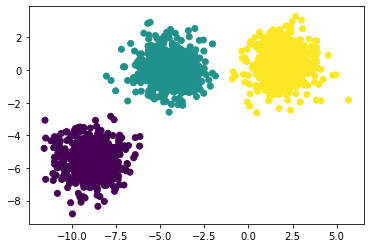

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [5]:
print(euclidean_distance(np.array([1, 2]), np.array([3, 4])))

2.8284271247461903


In [6]:
class KMeans:
    def __init__(self, k, max_iter):
        self.k = k
        self.max_iter = max_iter
    
    def compute_label(self, X):
        
        distances = np.zeros((len(X), self.k))
        
        for i in range(len(X)):
            for j in range(self.k):
                distances[i][j] = euclidean_distance(X[i], self.core[j])
        labels = np.argmin(distances, axis=1)
    
        return labels
    
    def fit(self, X):
        core_index = np.random.choice(len(X), self.k)
        
        self.core = X[core_index]
        
        for _ in tqdm(range(self.max_iter)):
           
            labels = self.compute_label(X)
                
            for i in range(self.k):
                self.core[i] = np.mean(X[labels == i], axis=0)

In [7]:
model = KMeans(3, 200)
model.fit(X)

In [8]:
y_pred = model.compute_label(X)

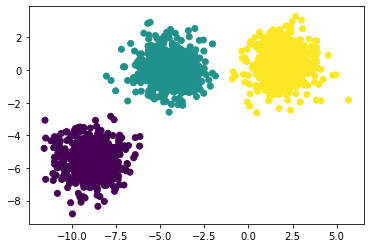

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)